In [51]:
%%javascript
/**********************************************************************************************
Known Mathjax Issue with Chrome - a rounding issue adds a border to the right of mathjax markup
https://github.com/mathjax/MathJax/issues/1300
A quick hack to fix this based on stackoverflow discussions: 
http://stackoverflow.com/questions/34277967/chrome-rendering-mathjax-equations-with-a-trailing-vertical-line
**********************************************************************************************/

$('.math>span').css("border-left-color","transparent")

<IPython.core.display.Javascript object>

In [52]:
%reload_ext autoreload
%autoreload 2

# MIDS - w261 Machine Learning At Scale
__Course Lead:__ Dr James G. Shanahan (__email__ Jimi via  James.Shanahan _AT_ gmail.com)

## Assignment - HW10


---
__Name:__  Megan Jasek  
__Class:__ MIDS w261 (Section Summer 2016 Group 2)     
__Email:__  meganjasek@iSchool.Berkeley.edu     
__Week:__   10

# Table of Contents <a name="TOC"></a> 

1.  [HW Introduction](#1)   
2.  [HW References](#2)
3.  [HW Problems](#3)   
    10.0.  [Short Answer Questions](#HW10.0)    
    10.1.  [Word Count plus sorting](#HW10.1)   
    10.2.  [MLlib-centric Kmeans](#HW10.2)    
    10.3.  [Homegrown KMeans in Spark](#HW10.3)    
    10.4.  [Making Homegrown KMeans more efficient](#HW10.4)  
    10.5.  [OPTIONAL Weighted KMeans](#HW10.5)  
    10.6.  [OPTIONAL Linear Regression](#HW10.6)  
    10.7.  [OPTIONAL Error surfaces](#HW10.7)



<a name="1">
# 1 Instructions
[Back to Table of Contents](#TOC)
* Homework submissions are due by Tueday, 07/28/2016 at 11AM (West Coast Time).


* Prepare a single Jupyter note, please include questions, and question numbers in the questions and in the responses.
Submit your homework notebook via the following form:

   + [Submission Link - Google Form](
https://docs.google.com/forms/d/1ZOr9RnIe_A06AcZDB6K1mJN4vrLeSmS2PD6Xm3eOiis/viewform?usp=send_form 
)


### Documents:
* IPython Notebook, published and viewable online.
* PDF export of IPython Notebook.
    
<a name="2">
# 2 Useful References
[Back to Table of Contents](#TOC)

* Karau, Holden, Konwinski, Andy, Wendell, Patrick, & Zaharia, Matei. (2015). Learning Spark: Lightning-fast big data analysis. Sebastopol, CA: O’Reilly Publishers.
* Hastie, Trevor, Tibshirani, Robert, & Friedman, Jerome. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Stanford, CA: Springer Science+Business Media. (Download for free [here](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf))

<a name="3">
# 3 HW Problems
[Back to Table of Contents](#TOC)

<a name="HW10.0"></a><h2 style="color:darkblue"> HW10.0: Short answer questions </h2>
[Back to Table of Contents](#TOC)


__What is Apache Spark and how is it different to Apache Hadoop? __

__Fill in the blanks:
Spark API consists of interfaces to develop applications based on it in Java, ___ BLANKS __ languages (list languages). __

<hr>

__Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or ????? in a distributed manner. __

<hr>

__What is an RDD and show a fun example of creating one and bringing the first element back to the driver program. __

<hr>


### Create Spark Context

In [1]:
import pyspark
from pyspark.sql import SQLContext

# We can give a name to our app (to find it in Spark WebUI) and configure execution mode
# In this case, it is local multicore execution with "local[*]"
#app_name = "example-logs"
app_name = "HW10"
master = "local[*]"
conf = pyspark.SparkConf().setAppName(app_name).setMaster(master)
sc.stop()
sc = pyspark.SparkContext(conf=conf)
sqlContext = SQLContext(sc)

print sc
print sqlContext

In [ ]:
#sc.stop()

<a name="HW10.1"> <h2 style="color:darkgreen">HW10.1 WordCount plus sorting </h2>
[Back to Table of Contents](#TOC)

The following notebooks will be useful to jumpstart this collection of Homework exercises:


* [Example Notebook with Debugging tactics in Spark](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/jqjllp8kmf1eolk/WordCountDebugging-Example.ipynb)
* [Word Count Quiz](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/vgmpivsi4rvqz0s/WordCountQuiz.ipynb)
* [Work Count Solution](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/dxv3dmp1vluuo8i/WordCountQuiz-Solution.ipynb)

---
In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document (with no solutions in it) as a the example document to run an experiment.  Report the following: 
* provide a sorted list of tokens in decreasing order of frequency of occurence limited to [top 20 most frequent only] and [bottom 10 least frequent]. 


__OPTIONAL__ 
Feel free to do a secondary sort where words with the same frequncy are sorted alphanumerically increasing. Plseas refer to the [following notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/uu5afr3ufpm9fy8/SecondarySort.ipynb)
 for examples of secondary sorts in Spark. Please provide the following [top 20 most frequent terms only] and [bottom 10 least frequent terms]

__NOTE__ [Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__

### Wordcount sorted by decreasing order of frequency

In [7]:
from operator import add
wordCount = sc.textFile('MIDS-MLS-HW-10.txt').flatMap(lambda x: x.strip().split()) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(add) \
    .map(lambda (x, y): (y, x)) \
    .sortByKey(False) \
    .map(lambda (x, y): (y, x))
results_count = wordCount.count()
for i, wc in enumerate(wordCount.collect()):
    if (i < 20) or (i >= results_count-10):
        print('%d. %s - %d' % (i+1, wc[0], wc[1]))

1. the - 70
2. and - 36
3. in - 25
4. of - 24
5. a - 18
6. for - 12
7. code - 12
8. to - 12
9. is - 11
10. model - 11
11. with - 10
12. data - 10
13. === - 9
14. as - 9
15. on - 9
16. plot - 9
17. this - 8
18. = - 8
19. Using - 8
20. your - 8
474. 20, - 1
475. descent - 1
476. other - 1
477. give - 1
478. center - 1
479. sets - 1
480. element - 1
481. graphs - 1
482. 10.1: - 1
483. #10 - 1


<a name="HW10.1.1"><h2 style="color:darkgreen">HW10.1.1 </h2>
[Back to Table of Contents](#TOC)

Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.


### Wordcount with lower case letters (a-z) sorted by decreasing order of frequency

In [8]:
from operator import add
import re
def filterLowerCase(s):
    pattern = re.compile("[a-z]")
    return bool(pattern.match(s))

wordCount = sc.textFile('MIDS-MLS-HW-10.txt').flatMap(lambda x: x.strip().split()) \
    .filter(filterLowerCase) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(add) \
    .map(lambda (x, y): (y, x)) \
    .sortByKey(False) \
    .map(lambda (x, y): (y, x))
results_count = wordCount.count()
for i, wc in enumerate(wordCount.collect()):
    if (i < 20) or (i >= results_count-10):
        print('%d. %s - %d' % (i+1, wc[0], wc[1]))

1. the - 70
2. and - 36
3. in - 25
4. of - 24
5. a - 18
6. for - 12
7. code - 12
8. to - 12
9. is - 11
10. model - 11
11. with - 10
12. data - 10
13. as - 9
14. on - 9
15. plot - 9
16. this - 8
17. your - 8
18. each - 7
19. domain - 6
20. from - 6
304. applications - 1
305. notebook - 1
306. such - 1
307. descent - 1
308. give - 1
309. center - 1
310. sets - 1
311. element - 1
312. graphs - 1
313. title - 1


<a name="HW10.2"> <h2 style="color:darkblue"> HW10.2: MLlib-centric KMeans</h2>
[Back to Table of Contents](#TOC)

Using the following  MLlib-centric KMeans code snippet: 

<pre>
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt


# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))

# Save and load model
clusters.save(sc, "myModelPath")
sameModel = KMeansModel.load(sc, "myModelPath")

</pre>

__NOTE__ <p> The  __kmeans_data.txt__ is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 

__TASKS__
* Run this code snippet and list the clusters that your find.
* compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.

In [9]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
# NOTE  kmeans_data.txt is available here 
#          https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return sqrt(sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))
print clusters.centers

# Save and load model
modelDirectory = 'kmeans_mllib_model'
!rm -rf $modelDirectory
clusters.save(sc, modelDirectory)
sameModel = KMeansModel.load(sc, modelDirectory)

Within Set Sum of Squared Error = 0.692820323028
[array([ 0.1,  0.1,  0.1]), array([ 9.1,  9.1,  9.1])]


<a name="HW10.3"><h2 style="color:darkgreen"> HW10.3: Homegrown KMeans in Spark </h2>
[Back to Table of Contents](#TOC)

Download the following KMeans [notebook](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb).

Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data.
Then run MLlib's Kmean implementation on this data  and report your results as follows:

* plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations.
* in each plot please report the Within Set Sum of Squared Errors for the found clusters (as part of the title WSSSE). Comment on the progress of this measure as  the KMEans algorithms runs for more iterations. Then plot the WSSSE as a function of the iteration (1, 10, 20, 30, 40, 50, 100).



### Data Generation

In [2]:
import numpy as np
np.random.seed(114)
size1 = size2 = size3 = 100
samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)
# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('kmeans_point_data.csv',data,delimiter = ',')

### Data Visualization

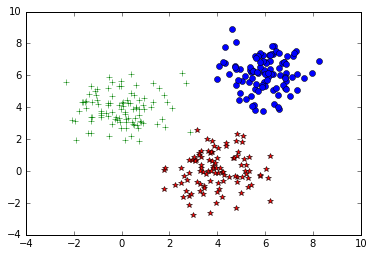

In [3]:
%matplotlib inline
import pylab 
pylab.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
pylab.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
pylab.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
pylab.show()

In [4]:
%matplotlib inline
import pylab
#plot centroids and data points for each iteration
def plot_iteration(means):
    pylab.plot(samples1[:, 0], samples1[:, 1], '.', color = 'blue')
    pylab.plot(samples2[:, 0], samples2[:, 1], '.', color = 'blue')
    pylab.plot(samples3[:, 0], samples3[:, 1],'.', color = 'blue')
    pylab.plot(means[0][0], means[0][1],'*',markersize =10,color = 'red')
    pylab.plot(means[1][0], means[1][1],'*',markersize =10,color = 'red')
    pylab.plot(means[2][0], means[2][1],'*',markersize =10,color = 'red')
    pylab.show()

Iteration 1
Within Set Sum of Squared Error = 383.588528204
Centroids:
[[-0.10677626  3.88282935]
 [ 5.89751298  6.13291108]
 [ 3.95045042  0.0444371 ]]


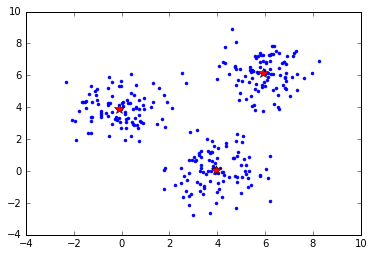

Iteration 10
Within Set Sum of Squared Error = 383.375135444
Centroids:
[[ 3.95045042  0.0444371 ]
 [ 5.96333346  6.13920441]
 [-0.05196282  3.92192865]]


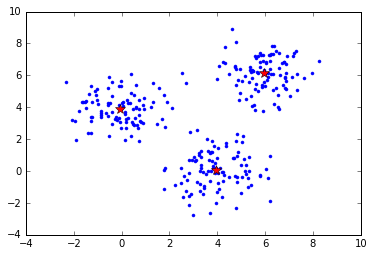

Iteration 20
Within Set Sum of Squared Error = 383.375135444
Centroids:
[[-0.05196282  3.92192865]
 [ 3.95045042  0.0444371 ]
 [ 5.96333346  6.13920441]]


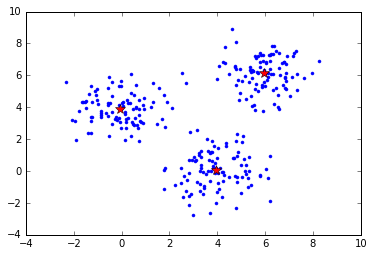

Iteration 100
Within Set Sum of Squared Error = 383.375135444
Centroids:
[[-0.05196282  3.92192865]
 [ 3.95045042  0.0444371 ]
 [ 5.96333346  6.13920441]]


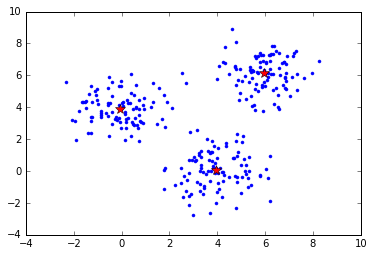

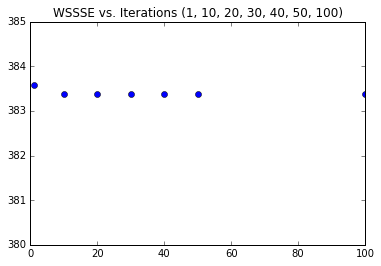

In [64]:
%matplotlib inline
import pylab 
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
data = sc.textFile("kmeans_point_data.csv")  
parsedData = data.map(lambda line: array([float(x) for x in line.split(',')]))

WSSSE_dict = {}
clusters_dict = {}
iterations = [1, 10, 20, 30, 40, 50, 100]
#iterations = [1]
for i in iterations:
    # Build the model (cluster the data into 3 clusters)
    clusters = KMeans.train(parsedData, 3, maxIterations=i, runs=10, initializationMode="random")
    clusters_dict[i] = clusters

    # Evaluate clustering by computing Within Set Sum of Squared Errors
    def error(point):
        center = clusters.centers[clusters.predict(point)]
        return sqrt(sum([x**2 for x in (point - center)]))

    WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
    WSSSE_dict[i] = WSSSE

    # Plot the points only for iterations 1, 10, 20 and 100
    if i in [1, 10, 20, 100]:
        print 'Iteration', str(i)
        print("Within Set Sum of Squared Error = " + str(WSSSE))
        print 'Centroids:'
        print np.array(clusters.centers)
        plot_iteration(clusters.centers)
    
    # Save and load model
    modelDirectory = 'kmeans_mllib_model_' + str(i)
    !rm -rf $modelDirectory
    clusters.save(sc, modelDirectory)
    #sameModel = KMeansModel.load(sc, modelDirectory)

for i in iterations:
    pylab.plot(i,WSSSE_dict[i],'o',color = 'blue')
pylab.title('WSSSE vs. Iterations (1, 10, 20, 30, 40, 50, 100)')
pylab.ylim(380,385) 
pylab.show()

<a name="HW10.4"><h2 style="color:darkblue"> HW10.4: KMeans Experiments  </h2>
[Back to Table of Contents](#TOC)

Using this provided [homegrown Kmeans code](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb)   repeat the experiments in HW10.3. Explain any differences between the results in HW10.3 and HW10.4. 

**ANSWER:**  
10.4 took longer to converge because it was not being averaged by the runs parameter.  
10.4 started at a fixed point and not a random point and took longer to converge because it was not being averaged by the runs parameter.  
Being started at a fixed point also means that each time the results are the same.  

In [5]:
import numpy as np
from math import sqrt

#Calculate which class each data point belongs to and the error
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    error = sqrt(sum((x - centroids[closest_centroid_idx])**2))
    return (closest_centroid_idx,(x,1,error))

Iteration time is 1.4355430603
Iteration 1
Within Set Sum of Squared Error = 1093.7668628
Centroids:
[[ 1.30294393 -0.04702418]
 [ 3.75700875  2.62593297]
 [ 2.72830099  5.9395683 ]]


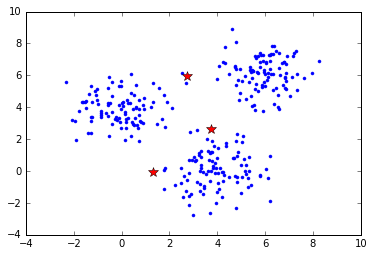

Iteration time is 0.197635889053
Iteration time is 0.176810979843
Iteration time is 0.181766986847
Iteration time is 0.185395956039
Iteration time is 0.17240691185
Iteration time is 0.154762983322
Iteration time is 0.192917108536
Iteration time is 0.185378789902
Iteration time is 0.219339132309
Iteration 10
Within Set Sum of Squared Error = 383.400869116
Centroids:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]


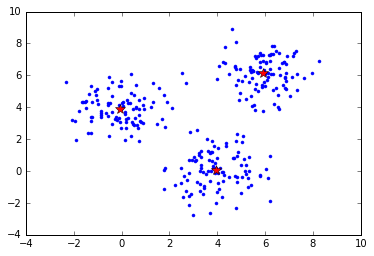

Iteration time is 0.184226989746
Iteration time is 0.176434993744
Iteration time is 0.170886039734
Iteration time is 0.206452131271
Iteration time is 0.200911998749
Iteration time is 0.157499790192
Iteration time is 0.168044090271
Iteration time is 0.198951005936
Iteration time is 0.176796913147
Iteration time is 0.178330898285
Iteration 20
Within Set Sum of Squared Error = 383.400869116
Centroids:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]


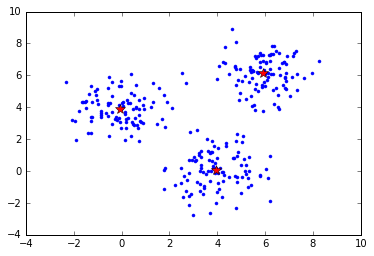

Iteration time is 0.186336040497
Iteration time is 0.157985925674
Iteration time is 0.152634143829
Iteration time is 0.149233102798
Iteration time is 0.162854909897
Iteration time is 0.164275169373
Iteration time is 0.143741130829
Iteration time is 0.146244049072
Iteration time is 0.142693042755
Iteration time is 0.179105997086
Iteration time is 0.145358085632
Iteration time is 0.141992807388
Iteration time is 0.143616914749
Iteration time is 0.142223119736
Iteration time is 0.177827835083
Iteration time is 0.154508113861
Iteration time is 0.164326190948
Iteration time is 0.144386053085
Iteration time is 0.154922962189
Iteration time is 0.141021966934
Iteration time is 0.142060041428
Iteration time is 0.141407012939
Iteration time is 0.150868177414
Iteration time is 0.158128976822
Iteration time is 0.138033866882
Iteration time is 0.146490812302
Iteration time is 0.143466949463
Iteration time is 0.144965171814
Iteration time is 0.187729120255
Iteration time is 0.142505168915
Iteration 

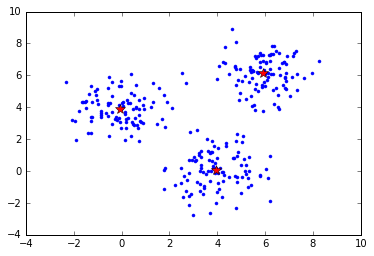

Final Results:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]
Average Iteration Time 0.16657088995


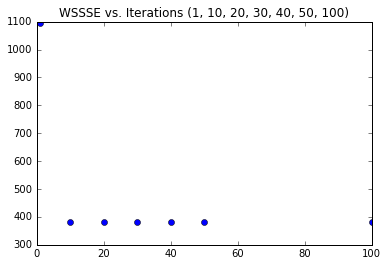

In [6]:
import time
K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]])

D = sc.textFile("kmeans_point_data.csv").cache()
WSSSE_dict = {}
iter_num = 0
sum_time = 0.0
for iter_num in range(1,101):  
    start_time = time.time()
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1],x[2]+y[2])).collect()
    #res [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)), 
    #     (2, (array([ 6023.84995923,  5975.48511018]), 1000)), 
    #     (1, (array([ 3986.85984761,    15.93153464]), 999))]
    # res[1][1][1] returns 1000 here
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    WSSSE = sum([x[1][2] for x in res])  #sum up the error for all clusters
    WSSSE_dict[iter_num] = WSSSE
    iter_time = time.time() - start_time 
    print 'Iteration time is', iter_time
    sum_time += iter_time

    # Plot the points only for iterations 1, 10, 20 and 100
    if iter_num in [1, 10, 20, 100]:
        print "Iteration", str(iter_num)
        print("Within Set Sum of Squared Error = " + str(WSSSE))
        print 'Centroids:'
        print centroids_new
        plot_iteration(centroids_new)
    centroids = centroids_new
    iter_num = iter_num + 1 
print "Final Results:"
print centroids
print 'Average Iteration Time', sum_time/100.0

iterations = [1, 10, 20, 30, 40, 50, 100]
for i in iterations:
    pylab.plot(i,WSSSE_dict[i],'o',color = 'blue')
pylab.title('WSSSE vs. Iterations (1, 10, 20, 30, 40, 50, 100)')
pylab.show()

<a name="HW10.4.1"><h2 style="color:darkblue"> HW10.4.1: Making Homegrown KMeans more efficient  </h2>
[Back to Table of Contents](#TOC)

The above provided homegrown KMeans implentation in not the most efficient. How can you make it more efficient? Make this change in the code and show it work and comment on the gains you achieve. 

Broadcast variables were used.  From the docs (http://spark.apache.org/docs/latest/programming-guide.html#broadcast-variables):  
"Broadcast variables allow the programmer to keep a read-only variable cached on each machine rather than shipping a copy of it with tasks. They can be used, for example, to give every node a copy of a large input dataset in an efficient manner. Spark also attempts to distribute broadcast variables using efficient broadcast algorithms to reduce communication cost."
The centroids were broadcast out to the executor nodes.

Sorting was removed as it adds no value.  
    res = sorted(res,key = lambda x : x[0])  #sort based on clusted ID  

And if we were sorting, using this line:  
    res = D.map(nearest_centroid_broadcast).reduceByKey(calculate_results).sortByKey().collect()  
with .sortByKey() doubled run time due presumably because it causes a shuffle to happen in Spark which is an expensive operation.



### HINT: have a look at  [this linear regression notebook](    http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb)

In [7]:
import numpy as np
from math import sqrt

#Calculate which class each data point belongs to and the error
def nearest_centroid_broadcast(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids.value)**2, axis=1).argmin()
    error = sqrt(sum((x - centroids.value[closest_centroid_idx])**2))
    return (closest_centroid_idx,(x,1,error))

#Calculate which class each data point belongs to and the error
# outputs an iterator
def nearest_centroid_partition(lines):
    sum_points = np.zeros(2)
    count = 0
    sum_error = 0.0
    for line in lines:
        x = np.array([float(f) for f in line.split(',')])
        closest_centroid_idx = np.sum((x - centroids.value)**2, axis=1).argmin()
        error = sqrt(sum((x - centroids.value[closest_centroid_idx])**2))
        sum_points += x
        count += 1
        sum_error += error
    return [sum_points, count, sum_error]

def calculate_results(x, y):
    points = x[0]+y[0]
    count = x[1]+y[1]
    error = x[2]+y[2]
    next_centroids = points/float(count)  #divide by cluster size
    return (points, count, error, next_centroids)

Iteration time is 0.208893060684
Iteration 1
Within Set Sum of Squared Error = 1093.7668628
Centroids:
[[ 1.30294393 -0.04702418]
 [ 2.72830099  5.9395683 ]
 [ 3.75700875  2.62593297]]


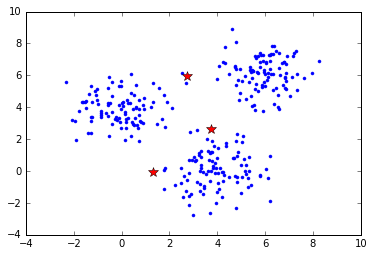

Iteration time is 0.139776945114
Iteration time is 0.137269973755
Iteration time is 0.132931947708
Iteration time is 0.135256052017
Iteration time is 0.14568400383
Iteration time is 0.136309146881
Iteration time is 0.135231971741
Iteration time is 0.139034986496
Iteration time is 0.147033929825
Iteration 10
Within Set Sum of Squared Error = 383.400869116
Centroids:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]


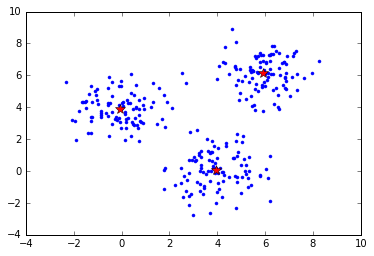

Iteration time is 0.135587930679
Iteration time is 0.172623157501
Iteration time is 0.132158041
Iteration time is 0.140528917313
Iteration time is 0.164645910263
Iteration time is 0.14568400383
Iteration time is 0.153184175491
Iteration time is 0.140884876251
Iteration time is 0.148830890656
Iteration time is 0.135205030441
Iteration 20
Within Set Sum of Squared Error = 383.400869116
Centroids:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]


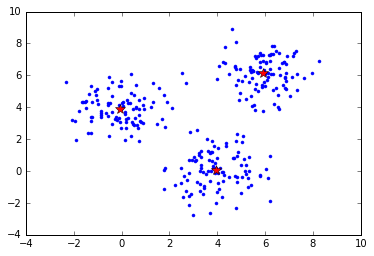

Iteration time is 0.137000083923
Iteration time is 0.13393497467
Iteration time is 0.132889032364
Iteration time is 0.133678913116
Iteration time is 0.142696857452
Iteration time is 0.137102127075
Iteration time is 0.133219003677
Iteration time is 0.161875963211
Iteration time is 0.157947063446
Iteration time is 0.168009996414
Iteration time is 0.131650924683
Iteration time is 0.133362054825
Iteration time is 0.136015176773
Iteration time is 0.144885063171
Iteration time is 0.133387088776
Iteration time is 0.138531923294
Iteration time is 0.132404088974
Iteration time is 0.143706083298
Iteration time is 0.13720202446
Iteration time is 0.131271123886
Iteration time is 0.131556034088
Iteration time is 0.134469985962
Iteration time is 0.144207000732
Iteration time is 0.129698038101
Iteration time is 0.13255405426
Iteration time is 0.130244016647
Iteration time is 0.14196395874
Iteration time is 0.145551204681
Iteration time is 0.131607055664
Iteration time is 0.138318061829
Iteration time

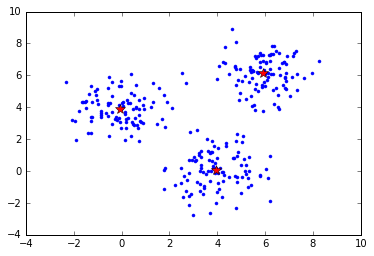

Final Results:
[[-0.07831252  3.89938731]
 [ 3.95045042  0.0444371 ]
 [ 5.92934311  6.13912298]]
Average Iteration Time 0.140167725086


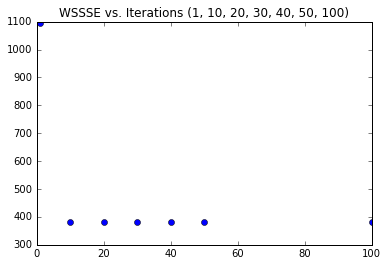

In [8]:
import time
K = 3
# Initialization: initialization of parameter is fixed to show an example
centroids = sc.broadcast(np.array([[0.0,0.0],[2.0,2.0],[0.0,7.0]]))

D = sc.textFile("kmeans_point_data.csv").cache()
WSSSE_dict = {}
sum_time = 0.0
iter_num = 0
for iter_num in range(1,101):  
    start_time = time.time()
    res = D.map(nearest_centroid_broadcast).reduceByKey(calculate_results).collect()
    centroids_new = np.array([x[1][3] for x in res])
    WSSSE = sum([x[1][2] for x in res])  #sum up the error for all clusters
    WSSSE_dict[iter_num] = WSSSE
    iter_time = time.time() - start_time 
    print 'Iteration time is', iter_time
    sum_time += iter_time
    
    # Plot the points only for iterations 1, 10, 20 and 100
    if iter_num in [1, 10, 20, 100]:
        print "Iteration", str(iter_num)
        print("Within Set Sum of Squared Error = " + str(WSSSE))
        print 'Centroids:'
        print centroids_new
        plot_iteration(centroids_new)
    centroids = sc.broadcast(centroids_new)
    iter_num = iter_num + 1 
print "Final Results:"
print centroids.value
print 'Average Iteration Time', sum_time/100.0

iterations = [1, 10, 20, 30, 40, 50, 100]
for i in iterations:
    pylab.plot(i,WSSSE_dict[i],'o',color = 'blue')
pylab.title('WSSSE vs. Iterations (1, 10, 20, 30, 40, 50, 100)')
pylab.show()

<a name="HW10.5"><h2 style="color:darkgreen"> HW10.5: OPTIONAL Weighted KMeans  </h2>
[Back to Table of Contents](#TOC)

Using this provided [homegrown Kmeans code](http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb), modify it to do a weighted KMeans and repeat the experiements in HW10.3. Explain  any differences between the results in HW10.3 and HW10.5.

NOTE: Weight each example as follows using the inverse vector length (Euclidean norm): 

> weight(X)= 1/||X||, 

where ||X|| = SQRT(X.X)= SQRT(X1^2 + X2^2)

Here X is vector made up of two values X1 and X2.

__[Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__

In [71]:
## Code goes here

In [72]:
## Drivers & Runners

In [73]:
## Run Scripts, S3 Sync

<a name="HW10.6"><h2 style="color:darkblue"> HW10.6 OPTIONAL Linear Regression</h2>
[Back to Table of Contents](#TOC)
<a name="HW10.6.1"><h2 style="color:darkblue"> HW10.6.1 OPTIONAL Linear Regression</h2>
[Back to Table of Contents](#TOC)

Using [this linear regression notebook](    http://nbviewer.jupyter.org/urls/dl.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb):


* Generate 2 sets of data with 100 data points using the data generation code provided and plot each in separate plots. Call one the training set and the other the testing set.

* Using MLLib's LinearRegressionWithSGD train up a linear regression model with the training dataset and evaluate with the testing set. What a good number of iterations for training the linear regression model? Justify with plots (e.g., plot MSE as a function of the number of iterations) and words. 


<a name="HW10.6.2"><h2 style="color:darkblue"> HW10.6.2 OPTIONAL Linear Regression</h2>
[Back to Table of Contents](#TOC)

In the notebook provided above, in the cell labeled "Gradient descent (regularization)".

* Fill in the blanks and get this code to work for LASS0 and RIDGE linear regression.

* Using the data from HW10.6.1 tune the hyper parameters of your LASS0 and RIDGE regression. Report your findings with words and plots.

In [74]:
## Code goes here

In [75]:
## Drivers & Runners

In [76]:
## Run Scripts, S3 Sync

<a name="HW10.7"><h2 style="color:darkgreen"> HW10.7 OPTIONAL Error surfaces </h2>
[Back to Table of Contents](#TOC)

Here is a link to R code with 1 test drivers that plots the linear regression model in  model space and in the domain space:

> https://www.dropbox.com/s/3xc3kwda6d254l5/PlotModelAndDomainSpaces.R?dl=0

Here is a sample output from this script: 
      
> https://www.dropbox.com/s/my3tnhxx7fr5qs0/image%20%281%29.png?dl=0

Please use this as inspiration and code a equivalent error surface and heatmap (with isolines) in Spark and show the trajectory of learning taken during gradient descent(after each n-iterations of Gradient Descent):


Using Spark and  Python (using the above R Script as inspiration), plot the error surface for the linear regression model using a heatmap and contour plot. 
Also plot the current model in the original domain space for every 10th iteration.  Plot them side by side if possible  for each iteration: lefthand side plot is the model space(w0 and w01) and the righthand side plot is domain space (plot the corresponding model and training data in the problem domain space) with a final pair of graphs showing the entire trajectory in the model and domain space. Make sure to label your plots with iteration numbers, function, model space versus original domain space, MSE on the training data etc.

Also plot the MSE as a function of each iteration (possibly every 10th iteration). Dont forget to label both axis and the graph also. __[Please incorporate all referenced notebooks directly into this master notebook as cells for HW submission. I.e., HW submissions should comprise of just one notebook]__





In [77]:
## Code goes here

In [78]:
## Drivers & Runners

In [79]:
## Run Scripts, S3 Sync

[Back to Table of Contents](#TOC)
<center><div class='jumbotron'><h2 style='color:green'>-------  END OF HOWEWORK --------</h2></div></center>